# Análisis del dato

## Datos

In [1]:
import pandas as pd

# Leemos los datos de un archivo CSV en un DataFrame de Pandas
# Este archivo contiene nuestra base de datos filtrada obtenida en una fase anterior del proyecto
data = pd.read_csv(r'C:\Users\Carmen (TFG)\Documents\Bases de datos\Base_Final.csv')

## PCA

### Desarrollo del algoritmo

In [2]:
# Importamos las librerías necesarias: 
## pandas para trabajar con los datos en forma de DataFrame y realizar operaciones de manipulación de datos
## scikit-learn para el preprocesamiento y análisis de componentes principales (PCA)
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Nos quedamos con las variables númericas
numeric_features = data.select_dtypes(include=['float64', 'int64']).columns

# Rellenamos los valores nulos en las variables numéricas con la media de cada columna respectiva
data[numeric_features] = data[numeric_features].fillna(data[numeric_features].mean())
 
# Escalamos los datos numéricos para que todas las variables tengan media cero y varianza unitaria
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data[numeric_features])

# Aplicamos el análisis de componentes principales (PCA) a los datos escalados 
# para reducir la dimensionalidad y encontrar las características más importantes
pca = PCA()
principal_components = pca.fit_transform(scaled_data)

# Determinamos el número óptimo de componentes principales para retener, 
# eligiendo aquellos que expliquen al menos el 95% de la varianza total
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_explained_variance_ratio = pca.explained_variance_ratio_.cumsum()
n_components = len(cumulative_explained_variance_ratio[cumulative_explained_variance_ratio <= 0.95]) + 1
print("Número óptimo de componentes principales:", n_components)

# Aplicamos PCA nuevamente utilizando el número óptimo de componentes determinado anteriormente
pca = PCA(n_components=n_components)
principal_components = pca.fit_transform(scaled_data)

# Limpiamos la base de datos eliminando las filas que tienen valores nulos en las columnas 'ISIN' y 'Nombre'
data_cleaned = data.dropna(subset=['ISIN', 'Nombre'])

# Creamos un nuevo DataFrame con los componentes principales calculados y las columnas 'ISIN' y 'Nombre' como identificadores
principal_df = pd.DataFrame(data=principal_components, columns=[f'PC{i}' for i in range(1, n_components + 1)])
principal_df.insert(0, 'Nombre', data_cleaned['Nombre'])
principal_df.insert(0, 'ISIN', data_cleaned['ISIN'])
print(principal_df.head())

Número óptimo de componentes principales: 22
           ISIN                                  Nombre       PC1       PC2  \
0  ES0156873004          A&G Renta Fija Corto Plazo, FI -6.046792  0.230252   
1  ES0162957007              A&P Lifescience Fund A, FI  4.238726  3.664246   
2  ES0162957015              A&P Lifescience Fund B, FI  4.317933  3.602274   
3  ES0140074016  Abaco Global Value Opportunities B, FI  1.641120  8.766121   
4  ES0140074032  Abaco Global Value Opportunities C, FI  1.856322  8.618994   

        PC3       PC4       PC5       PC6       PC7       PC8  ...      PC13  \
0  2.015243  7.596092 -2.453089 -4.886978  2.362196 -1.587599  ... -1.321893   
1  2.741030  0.505569 -1.124825 -1.686485 -2.017632  3.619272  ... -1.021621   
2  2.919701  0.326956 -1.272919 -1.449368 -1.970573  3.573971  ... -1.019887   
3 -0.328274  1.929725  3.465507  1.427718  0.939828 -1.934893  ...  1.667263   
4  0.347191  1.731787  1.628293  2.357102  1.137300 -2.623141  ...  1.342351   


### Visualización

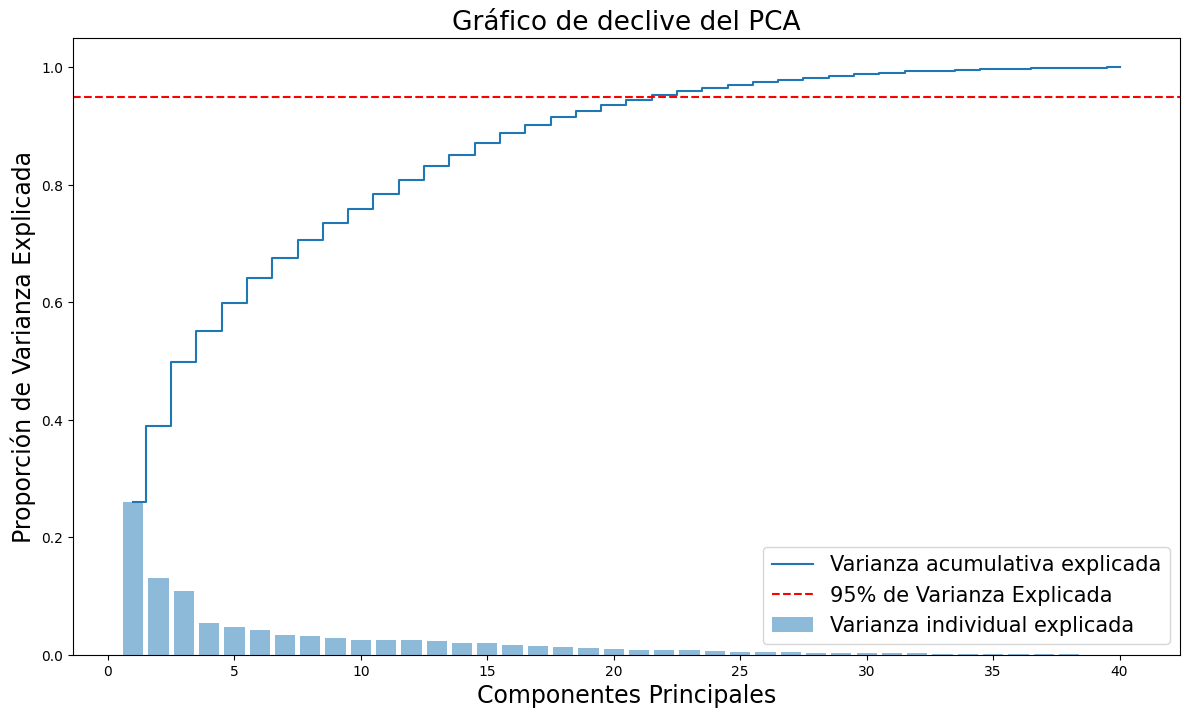

In [40]:
# Importamos la biblioteca matplot, para poder visualizar los componentes del modelo PCA
import matplotlib.pyplot as plt

# Generamos el scree plot con los datos reales de varianza explicada
plt.figure(figsize=(12, 7))
plt.bar(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, alpha=0.5, align='center',
        label='Varianza individual explicada') # barras para la variaza unitaria
plt.step(range(1, len(cumulative_explained_variance_ratio) + 1), cumulative_explained_variance_ratio, where='mid',
         label='Varianza acumulativa explicada') # línea para la varianza acumulativa
plt.axhline(y=0.95, color='r', linestyle='--', label='95% de Varianza Explicada')  # línea roja discontinua al 95%
plt.ylabel('Proporción de Varianza Explicada', fontsize = 17)
plt.xlabel('Componentes Principales', fontsize = 17)
plt.legend(loc='best', fontsize = 15)
plt.tight_layout()
plt.title('Gráfico de declive del PCA', fontsize = 19)
plt.show()

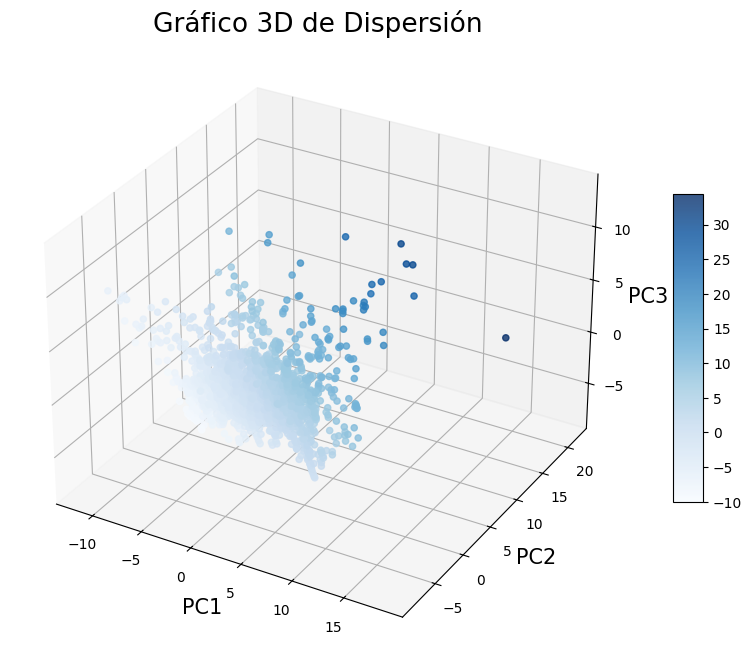

In [44]:
# Importamos las bibliotcas necesarias para este gráfico
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Seleccionamos los 3 primeros componentes principales: PC1, PC2 y PC3
df_subset = principal_df[['PC1', 'PC2', 'PC3']]

# Creamos el gráfico de dispersión en 3D
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(df_subset['PC1'], df_subset['PC2'], df_subset['PC3'], alpha=0.8, 
                     c=(df_subset['PC1'] + df_subset['PC2'] + df_subset['PC3']), cmap='Blues')

ax.set_xlabel('PC1', fontsize=15)
ax.set_ylabel('PC2', fontsize=15)
ax.set_zlabel('PC3', fontsize=15)
ax.set_title('Gráfico 3D de Dispersión', fontsize=19)

fig.colorbar(scatter, ax=ax, shrink=0.5, aspect=10)

plt.show()


### Medidas de adecuación

#### Prueba de Bartlett

In [45]:
# Importamos el modulo necesario para calcular la prueba de Barlett
from scipy.stats import bartlett

# Nos quedamos con las variables numéricas
numeric_features = data.select_dtypes(include=['float64', 'int64']).columns

# Rellenamos los valores nulos en las variables numéricas con la media de cada columna respectiva
data[numeric_features] = data[numeric_features].fillna(data[numeric_features].mean())

# Aplicamos la prueba de Barlett
statistic, p_value = bartlett(*data[numeric_features].transpose().values)

print("Estadístico de prueba de Barlett:", statistic)
print("Valor p de la prueba de Barlett:", p_value)

Estadístico de prueba de Barlett: 3862239.67641127
Valor p de la prueba de Barlett: 0.0


#### KMO

In [6]:
# Importamos el módulo kmo, para poder calcular el índice Kaiser-Meyer-Olkin (KMO)
from factor_analyzer.factor_analyzer import calculate_kmo

# Calculamos el índice de KMO para evaluar la idoneidad de los datos para el análisis factorial
kmo_all, kmo_model = calculate_kmo(pd.DataFrame(scaled_data))

print(f"KMO: {kmo_model}")

KMO: 0.7502534798931374


c:\Users\Carmen (TFG)\AppData\Local\Programs\Python\Python312\Lib\site-packages\factor_analyzer\utils.py:244: UserWarning: The inverse of the variance-covariance matrix was calculated using the Moore-Penrose generalized matrix inversion, due to its determinant being at or very close to zero.
  warnings.warn(


## Tratamiento previo

In [46]:
import numpy as np

# Seleccionamos 5 fondos de manera aleatoria con una semilla aleatoria de 42 
# para asegurar la fiabilidad de los resultados
np.random.seed(42) 
random_funds_indices = np.random.choice(principal_df.index, size=5, replace=False)
random_funds = principal_df.loc[random_funds_indices]

random_funds

,ISIN,Nombre,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,...,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20,PC21,PC22
415,ES0113506002,"BBVA Bonos 2024 II, FI",-2.703739,-0.024397,0.347211,0.311438,5.535480,-1.170741,1.301807,0.056967,...,1.737199,2.143066,1.429564,-0.347307,0.465330,-0.386306,-0.495411,-0.595420,0.337778,0.367408
1596,ES0152771038,"ING Direct Fondo Naranja Euro Stoxx 50, FI",6.625885,-6.976640,4.123876,6.632462,3.047504,8.194588,-3.990485,0.629679,...,1.318566,0.056028,-2.527292,-1.142389,-1.989186,5.324238,-2.257337,0.076407,0.135931,1.084694
1322,ES0116831043,Gestion Boutique/Yeste Patrimonial,-2.495073,1.571189,-0.099454,-0.863538,-0.974548,1.788638,-0.766932,0.286989,...,0.490036,0.136446,1.001179,0.010579,0.343391,0.244854,0.569376,0.137687,0.025087,-0.110513
2271,ES0173828031,"Sabadell Bonos Euro Base, FI",-2.415299,-1.141386,1.279725,-1.410484,-1.270827,-1.258586,-0.393307,-1.413859,...,-0.071005,-0.275412,0.481632,0.202612,-0.299460,0.481055,-1.105838,-0.453693,-0.048508,-0.074801
1966,ES0164704027,"Mutuafondo 2025 L, FI",-1.848222,0.302801,0.036073,0.035063,0.983170,0.294812,1.043346,-0.872947,...,-1.021946,-0.343784,-1.148610,-0.249196,0.234369,0.059749,0.092987,-0.668485,0.108917,-0.068640


## KMeans

### Elección nº de clusters

#### Elbow method

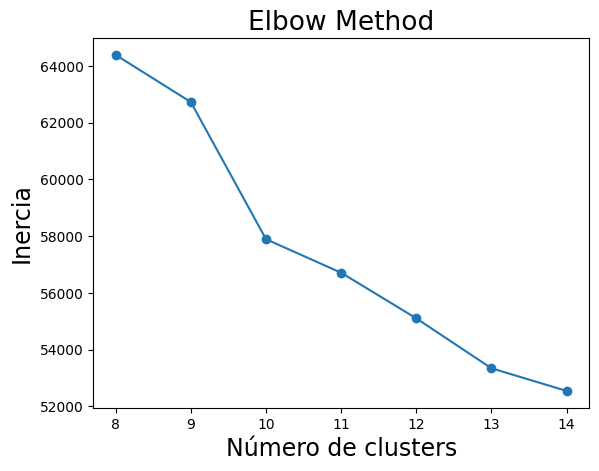

In [48]:
# Importamos el modelo kmeans para realizar el clustering
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Creamos una lista para almacenar los valores de la inercia de cada uno de los clusters
inertia = []

# Probamos diferentes número de clusters en un rango de 8 a 15, para obtener el valor de su inercia
for i in range(8, 15):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(principal_df.iloc[:, 2:])  # sin ISIN y Nombre
    inertia.append(kmeans.inertia_)

# Gráficamos el Elbow Method para ver la relacion entre el número de clusters y la inercia
plt.plot(range(8, 15), inertia, marker='o')
plt.xlabel('Número de clusters', fontsize = 17)
plt.ylabel('Inercia', fontsize = 17)
plt.title('Elbow Method', fontsize = 19)
plt.show()

#### BIC

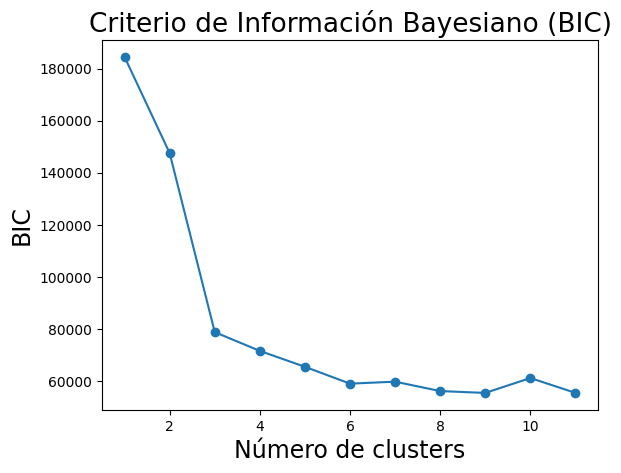

El número óptimo de clusters según el BIC es: 9


In [50]:
# Importamos el módulo GaussianMixture para realizar el modelado de mezclas gausianas
from sklearn.mixture import GaussianMixture
import numpy as np

# Creamos una lista para almacenar los valores de BIC para cada uno de los clusters
bic = []

# Probamos diferentes número de clusters en un rango de 5 a 15, para obtener el valor de su BIC
for i in range(1, 12):
    gmm = GaussianMixture(n_components=i, covariance_type='full', random_state=42)
    gmm.fit(principal_df.iloc[:, 2:])  # sin ISIN y Nombre
    bic.append(gmm.bic(principal_df.iloc[:, 2:]))  # Calculamos el BIC y lo almacenamos

# Graficamos el BIC en función del número de clusters para visualizar cómo varía el BIC con diferentes clusters
plt.plot(range(1, 12), bic, marker='o')
plt.xlabel('Número de clusters', fontsize = 17)
plt.ylabel('BIC', fontsize = 17)
plt.title('Criterio de Información Bayesiano (BIC)', fontsize = 19)
plt.show()

# Encontramos el número óptimo de clusters, que es el valor mínimo de BIC
optimal_k = np.argmin(bic) + 1
print("El número óptimo de clusters según el BIC es:", optimal_k)

### Desarrollo del algoritmo

In [51]:
# Importamos el modelo kmeans para realizar el clustering
from sklearn.cluster import KMeans

# Definimos el número de clusters como 10, en base a lo realizado en el apartado anterior
# y creamos un objeto KMeans. Utilizamos el método de inicialización 'k-means++', que elige los 
# centroides iniciales de manera más efectiva para acelerar la convergencia,
# y fijamos la semilla aleatoria para reproducibilidad. 
n_clusters = 10
kmeans = KMeans(n_clusters=n_clusters, init='k-means++', random_state = 42, n_init=1)
kmeans.fit(principal_df.iloc[:, 2:])  

# Asignamos las etiquetas de clusters al dataframe
clusters = kmeans.labels_
principal_df['Cluster'] = clusters

In [53]:
# Seleccionamos los clusters de los fondos seleccionados
selected_funds_clusters = principal_df.loc[random_funds_indices, ['ISIN', 'Nombre', 'Cluster']]
print(selected_funds_clusters)

# Identificamos el cluster más común de los fondos seleccionados, si hay varios, al azar
most_common_cluster = selected_funds_clusters['Cluster'].mode().sample(n=1, random_state=42).iloc[0]

# Seleccionamos un fondo aleatorio dentro del cluster, que no sean los seleccionados originalmente
recommended_funds_from_cluster = principal_df[(principal_df['Cluster'] == most_common_cluster) & (~principal_df.index.isin(random_funds_indices))]
recommended_fund_from_cluster = recommended_funds_from_cluster.sample(n=1, random_state=42)
recommended_fund_from_cluster[['ISIN', 'Nombre']]

              ISIN                                      Nombre  Cluster
415   ES0113506002                      BBVA Bonos 2024 II, FI        7
1596  ES0152771038  ING Direct Fondo Naranja Euro Stoxx 50, FI        4
1322  ES0116831043          Gestion Boutique/Yeste Patrimonial        5
2271  ES0173828031                Sabadell Bonos Euro Base, FI        0
1966  ES0164704027                       Mutuafondo 2025 L, FI        0


,ISIN,Nombre
2616,ES0113661039,"Santander RF Convertibles A, FI"


### Medidas de adecuación

In [57]:
# Importamos los modelos de las medidas a calcular
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

# Calculamos Silhouette Score usando los datos sin los identificadores
silhouette_avg = silhouette_score(principal_df.iloc[:, 2:], clusters)
print(f"Silhouette Score: {silhouette_avg}")

# Calculamos Calinski-Harabasz Index con los mismos datos
calinski_harabasz = calinski_harabasz_score(principal_df.iloc[:, 2:], clusters)
print(f"Calinski-Harabasz Index: {calinski_harabasz}")

# Calculamos Davies-Bouldin Index con los mismo datos
davies_bouldin = davies_bouldin_score(principal_df.iloc[:, 2:], clusters)
print(f"Davies-Bouldin Index: {davies_bouldin}")

Silhouette Score: 0.21774185163852205
Calinski-Harabasz Index: 414.19192154961775
Davies-Bouldin Index: 1.5378864162392385


### Visualización

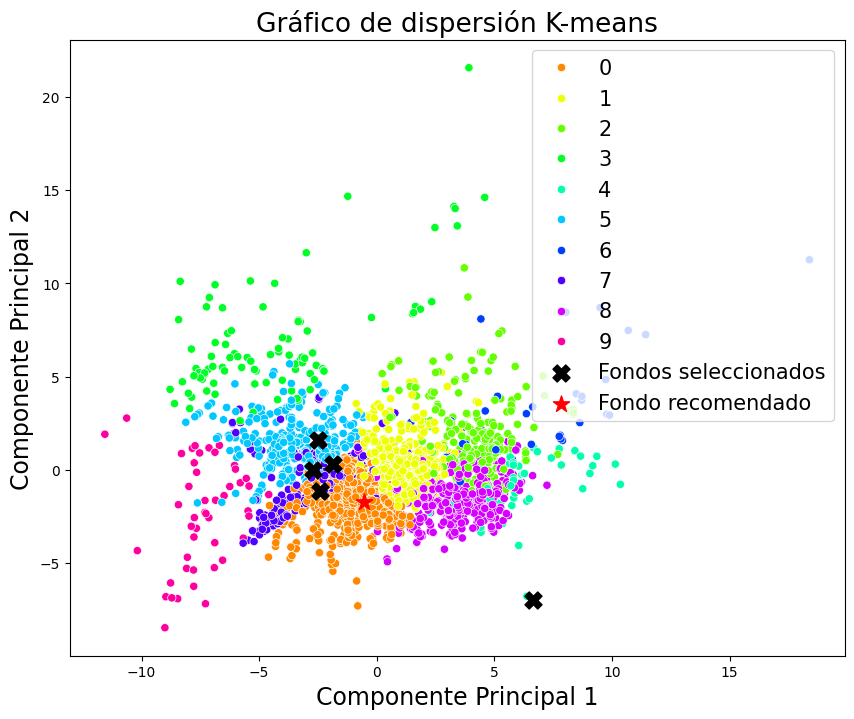

In [56]:
# Importamos las bibliotecas para gráficar
import matplotlib.pyplot as plt
import seaborn as sns

# Hacemos un gráfico de dispersion entre dos primeros componentes, coloreando cada uno de los clusters
plt.figure(figsize=(10, 8))
sns.scatterplot(x=principal_df.iloc[:, 2], y=principal_df.iloc[:, 3], hue=clusters, palette=sns.color_palette("hsv", n_clusters), legend='full')

# Resaltamos los fondos seleccionados con una cruz
selected_funds = principal_df.loc[random_funds_indices]
plt.scatter(selected_funds.iloc[:, 2], selected_funds.iloc[:, 3], s=150, c='black', label='Fondos seleccionados', marker='X')

# Resaltamos el fondo recomendado con  una x
plt.scatter(recommended_fund_from_cluster.iloc[:, 2], recommended_fund_from_cluster.iloc[:, 3], s=150, c='red', label='Fondo recomendado', marker='*')

plt.title('Gráfico de dispersión K-means', fontsize = 19)
plt.xlabel('Componente Principal 1', fontsize = 17)
plt.ylabel('Componente Principal 2', fontsize = 17)
plt.legend(fontsize = 15)
plt.show()

## RNA (Redes Neuronales Artificiales)

### Desarrollo del algoritmo

In [61]:
# Importamos las bibliotecas necesarias para desarrollar el modelo RNA
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Escalamos los datos, quedandonos solo con los componentes prinicpales
selected_features = principal_df.drop(columns=['ISIN', 'Nombre', 'Cluster'])
scaler = StandardScaler()
scaled_data = scaler.fit_transform(selected_features)

# Divimos los datos en train y test (20% del conjunto)
X_train, X_test = train_test_split(scaled_data, test_size=0.2, random_state=42)

# Construimos el modelo autoencoder, donde las keras son las capas
model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(X_train.shape[1], activation='linear') 
])
model.compile(optimizer='adam', loss='mean_squared_error')

# Entrenamos el modelo, primero con train y luego con test, 50 epocas, con un tamaño de 32
model.fit(X_train, X_train, epochs=50, batch_size=32, validation_data=(X_test, X_test))

# Predecimos las características de los fondos seleccionados utilizando las características escaladas
scaled_random_funds = scaler.transform(random_funds.iloc[:, 2:])
predicted_features = model.predict(scaled_random_funds)

# Calculamos la distancia entre los daos originales y los reconstruidos utilizando la norma euclidiana
predicted_features_full = model.predict(scaled_data)
distances_full = np.linalg.norm(scaled_data - predicted_features_full, axis=1)
for index in random_funds_indices:
    distances_full[index] = np.max(distances_full) + 1

# Identificamos el fondo más cercano basado en las características reconstruidas
recommended_index_full = np.argmin(distances_full)
recommended_ISIN_full = principal_df.iloc[recommended_index_full][['ISIN', 'Nombre']]
print("Fondo de inversión recomendado:")
print(recommended_ISIN_full)

Epoch 1/50


c:\Users\Carmen (TFG)\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


71/71 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.8673 - val_loss: 0.5722
Epoch 2/50
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.5127 - val_loss: 0.3298
Epoch 3/50
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2715 - val_loss: 0.2229
Epoch 4/50
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.2285 - val_loss: 0.1334
Epoch 5/50
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0990 - val_loss: 0.1083
Epoch 6/50
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0917 - val_loss: 0.0850
Epoch 7/50
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0673 - val_loss: 0.0677
Epoch 8/50
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0599 - val_loss: 0.0617
Epoch 9/50
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0510 - val_loss: 0.0523
Epoch 10/50
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0424 - val_loss: 0.0514
Epoch 11/50
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0334 - val_loss: 0.0462
Epoch 12/50
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0600 - val_loss: 0.0403


### Visualización

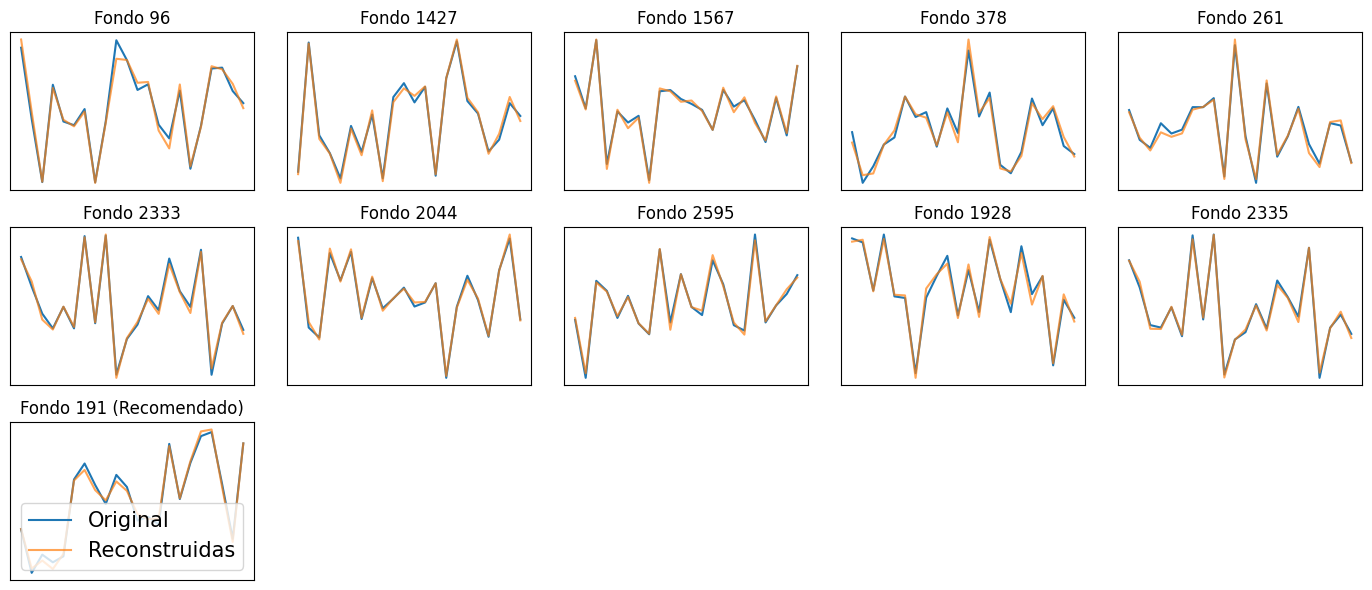

In [72]:
import matplotlib.pyplot as plt
import math

# Seleccionamos un subconjunto aleatorio de fondos incluyendo el fondo recomendado previamente
indices = np.random.choice(range(len(scaled_data)), 10, replace=False)
indices = np.append(indices, recommended_index_full) 

# Comparamos las características originales y las reconstruidas
original_features_subset = scaled_data[indices]
predicted_features_subset = predicted_features_full[indices]

# Graficamos
n_plots = len(indices)
n_cols = 5  # número de prueba para las columans
n_rows = math.ceil(n_plots / n_cols) 

plt.figure(figsize=(14, 6))

for i, index in enumerate(indices):
    plt.subplot(n_rows, n_cols, i + 1)
    plt.plot(original_features_subset[i], label='Original')
    plt.plot(predicted_features_subset[i], label='Reconstruidas', alpha=0.7)
    plt.title(f'Fondo {index}' + (' (Recomendado)' if index == recommended_index_full else ''))
    plt.xticks([])
    plt.yticks([])

plt.legend(fontsize=13, loc='lower center')
plt.tight_layout()
plt.show()

### Medidas de adecuación

In [79]:
from sklearn.metrics import mean_absolute_error, r2_score

# Calculamos el MSE en el conjunto de prueba
mse_test = mean_squared_error(X_test, model.predict(X_test))
print(f"MSE (Test): {mse_test}")

# Calculamos el MAE en el conjunto de prueba
mae_test = mean_absolute_error(X_test, model.predict(X_test))
print(f"MAE (Test): {mae_test}")

# Calculamos el R² Score en el conjunto de prueba
r2_score_test = r2_score(X_test, model.predict(X_test))
print(f"R² Score (Test): {r2_score_test}")

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
MSE (Test): 0.018414019836785284
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
MAE (Test): 0.08592979511785663
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
R² Score (Test): 0.978699499465693


#### Gráfico MSE

Epoch 1/50


71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0178 - val_loss: 0.0124
Epoch 2/50
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0072 - val_loss: 0.0126
Epoch 3/50
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0075 - val_loss: 0.0196
Epoch 4/50
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0164 - val_loss: 0.0131
Epoch 5/50
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0216 - val_loss: 0.0131
Epoch 6/50
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0081 - val_loss: 0.0145
Epoch 7/50
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0221 - val_loss: 0.0123
Epoch 8/50
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0096 - val_loss: 0.0119
Epoch 9/50
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0063 - val_loss: 0.0117
Epoch 10/50
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0080 - val_loss: 0.0165
Epoch 11/50
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0113 - val_loss: 0.0102
Epoch 12/50
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0058 - val_loss: 0.0121


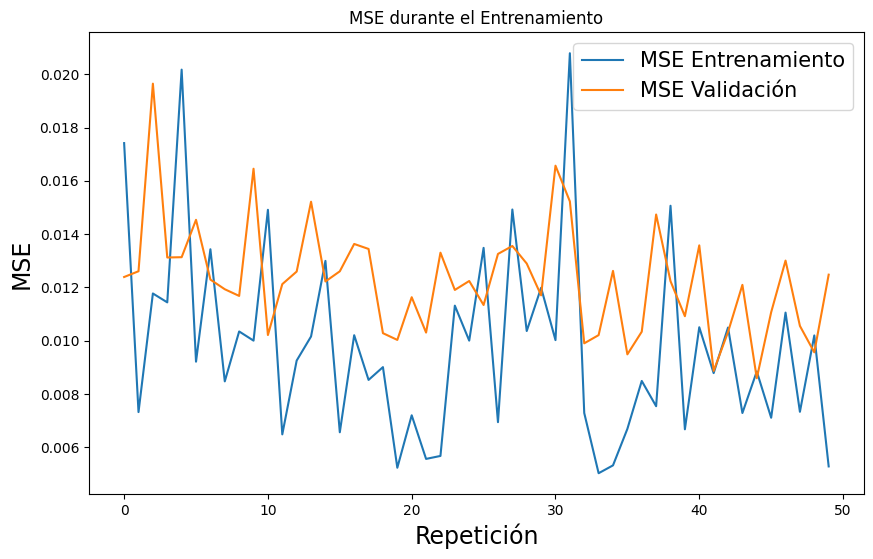

In [74]:
import matplotlib.pyplot as plt

history = model.fit(X_train, X_train, epochs=50, batch_size=32, validation_data=(X_test, X_test))

# Extraemos el MSE del historial 
train_mse = history.history['loss']
val_mse = history.history['val_loss']

plt.figure(figsize=(10, 6))
plt.plot(train_mse, label='MSE Entrenamiento')
plt.plot(val_mse, label='MSE Validación')
plt.xlabel('Repetición', fontsize = 17)
plt.ylabel('MSE', fontsize = 17)
plt.title('MSE durante el Entrenamiento', fontsize = 19)
plt.legend(fontsize = 15)
plt.show()

#### Gráfico para el MAE

Epoch 1/50


c:\Users\Carmen (TFG)\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


71/71 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - loss: 0.6131 - val_loss: 0.4401
Epoch 2/50
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.4076 - val_loss: 0.3025
Epoch 3/50
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.2850 - val_loss: 0.2325
Epoch 4/50
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.2390 - val_loss: 0.2086
Epoch 5/50
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1870 - val_loss: 0.1899
Epoch 6/50
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1749 - val_loss: 0.1549
Epoch 7/50
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1499 - val_loss: 0.1469
Epoch 8/50
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1394 - val_loss: 0.1421
Epoch 9/50
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1243 - val_loss: 0.1321
Epoch 10/50
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1196 - val_loss: 0.1223
Epoch 11/50
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1171 - val_loss: 0.1249
Epoch 12/50
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1139 - val_loss: 0.1159


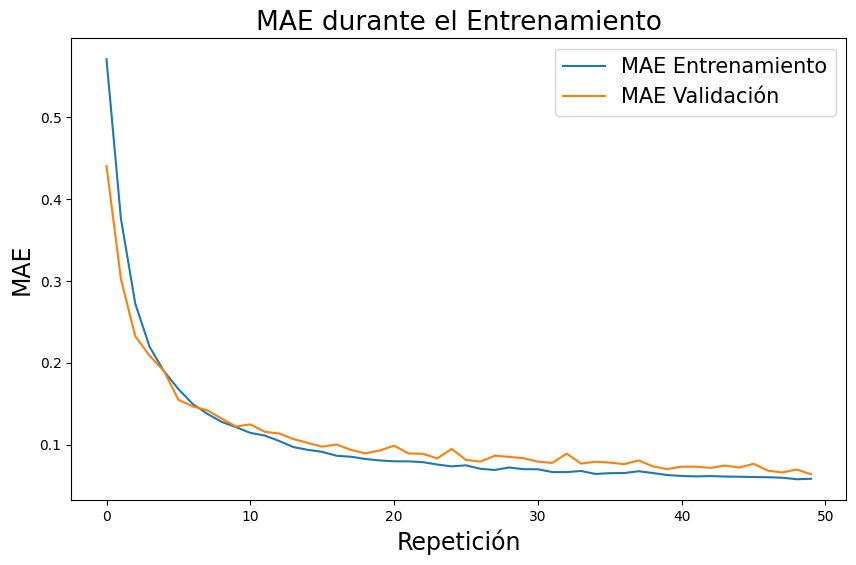

In [75]:
import matplotlib.pyplot as plt

# Construimos el modelo ahora con MAE
model_mae = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(X_train.shape[1], activation='linear') 
])
model_mae.compile(optimizer='adam', loss='mean_absolute_error')  

history_mae = model_mae.fit(X_train, X_train, epochs=50, batch_size=32, validation_data=(X_test, X_test))

# Extraemos el MAE del historial
train_mae = history_mae.history['loss']
val_mae = history_mae.history['val_loss']


plt.figure(figsize=(10, 6))
plt.plot(train_mae, label='MAE Entrenamiento')
plt.plot(val_mae, label='MAE Validación')
plt.xlabel('Repetición', fontsize = 17)
plt.ylabel('MAE', fontsize = 17)
plt.title('MAE durante el Entrenamiento', fontsize = 19)
plt.legend(fontsize = 15)
plt.show()

#### Gráfico para el R^2

Epoch 1/50


c:\Users\Carmen (TFG)\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


71/71 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.8997 - r_squared: 0.0851 - val_loss: 0.5686 - val_r_squared: 0.3961
Epoch 2/50
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.5128 - r_squared: 0.4944 - val_loss: 0.3222 - val_r_squared: 0.6610
Epoch 3/50
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2750 - r_squared: 0.7303 - val_loss: 0.1938 - val_r_squared: 0.7956
Epoch 4/50
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1707 - r_squared: 0.8404 - val_loss: 0.1398 - val_r_squared: 0.8485
Epoch 5/50
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1085 - r_squared: 0.8997 - val_loss: 0.0847 - val_r_squared: 0.9083
Epoch 6/50
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0771 - r_squared: 0.9312 - val_loss: 0.0703 - val_r_squared: 0.9249
Epoch 7/50
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0567 - r_squared: 0.9452 - val_loss: 0.0540 - val_r_squared: 0.9406
Epoch 8/50
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0677 - r_squared: 0.9499 - val_loss: 0.0488 - val_r_squ

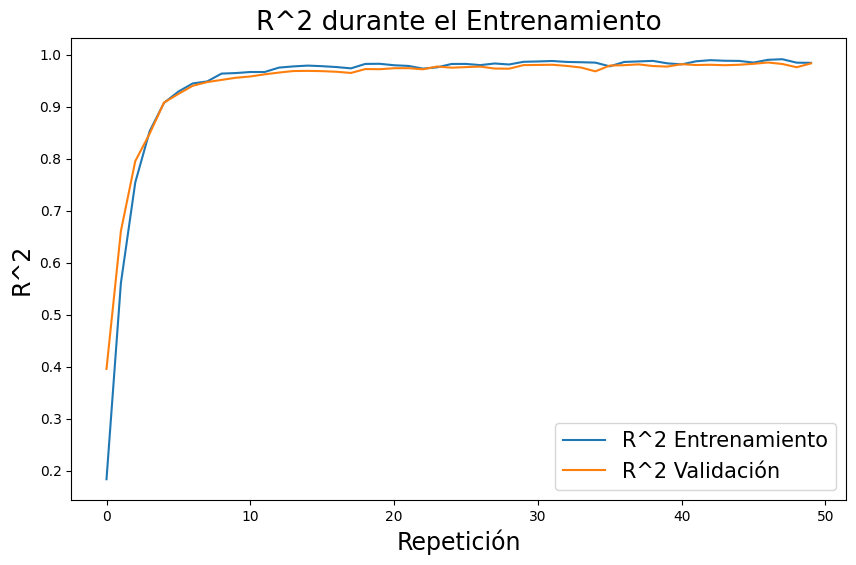

In [79]:
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

# R^2
def r_squared(y_true, y_pred):
    SS_res =  tf.reduce_sum(tf.square(y_true - y_pred))
    SS_tot = tf.reduce_sum(tf.square(y_true - tf.reduce_mean(y_true)))
    return 1 - SS_res/(SS_tot + tf.keras.backend.epsilon())

# Construimos el modelo ahora con R^2
model_r2 = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(X_train.shape[1], activation='linear') 
])
model_r2.compile(optimizer='adam', loss='mean_squared_error', metrics=[r_squared]) 

history_r2 = model_r2.fit(X_train, X_train, epochs=50, batch_size=32, validation_data=(X_test, X_test))

# Extraemos el R^2 del historial
train_r2 = history_r2.history['r_squared']
val_r2 = history_r2.history['val_r_squared']

plt.figure(figsize=(10, 6))
plt.plot(train_r2, label='R^2 Entrenamiento')
plt.plot(val_r2, label='R^2 Validación')
plt.xlabel('Repetición', fontsize = 17)
plt.ylabel('R^2', fontsize = 17)
plt.title('R^2 durante el Entrenamiento', fontsize = 19)
plt.legend(fontsize = 15)
plt.show()